<a href="https://colab.research.google.com/github/L-kiad/DO/blob/main/data_collections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


DATASETS FOR email-classification-spam-or-ham.ipynb

In [2]:
import pandas as pd

### ORIGINAL DATASETS

In [8]:
df = pd.read_csv('/content/gdrive/MyDrive/mail_datasets/email_spam/completeSpamAssassin.csv')
df.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


PROCESSING ORIGINAL DATASETS

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6046 non-null   int64 
 1   Body        6045 non-null   object
 2   Label       6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB


In [10]:
# Visualize null values and duplicated value
print(df.isnull().sum())
print(df.duplicated().sum())

Unnamed: 0    0
Body          1
Label         0
dtype: int64
0


In [11]:
# dropping null values
df.dropna(inplace=True)
# dropping redudant column
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1
...,...,...
6041,empty,0
6042,___ ___ ...,0
6043,IN THIS ISSUE:01. Readers write\n02. Extension...,0
6044,empty,0


GENERATE OTHERS INFOS USING NLTK

In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
df['no_char'] = df['Body'].apply(len)
df['no_words'] = df['Body'].apply(lambda x:len(nltk.word_tokenize(x)))
df['no_sent'] = df['Body'].apply(lambda x:len(nltk.sent_tokenize(x)))
df

,Body,Label,no_char,no_words,no_sent
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,191,12
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,139,5
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,113,4
3,##############################################...,1,2863,690,35
4,I thought you might like these:\n1) Slim Down ...,1,641,108,4
...,...,...,...,...,...
6041,empty,0,5,1,1
6042,___ ___ ...,0,16999,3092,91
6043,IN THIS ISSUE:01. Readers write\n02. Extension...,0,7299,1478,83
6044,empty,0,5,1,1


VUSIALIZE DATA

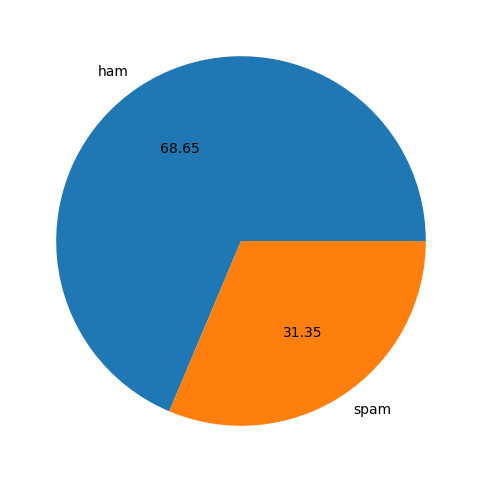

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.pie(df['Label'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

SAVE ORIGINAL DATA

In [16]:
df.to_csv('/content/gdrive/MyDrive/mail_datasets/cleaned_data_body_label_nowords_nochars_nosent/cleaned_orgin_data.csv', index=False)

## DATASETS 1

In [32]:
df1 = pd.read_csv('/content/gdrive/MyDrive/mail_datasets/Spam_Ham_data.csv')
df1.head()

,email,label,Subject,content
0,b'From exmh-workers-admin@redhat.com Thu Aug ...,0.0,new sequenc window,date wed number aug number number number chri ...
1,b'Return-Path: <Online#3.19578.34-UgGTgZFN19NA...,0.0,cnet newscom cabl compani crack wifi,htmlhead titlec compani crack nametopa logo ad...
2,b'Return-Path: <Online#3.19584.83-p1SYlJ1blFvQ...,0.0,save extra number ipaq number pda cnet shopper,htmlhead newslett hreftopa header tabl widthnu...
3,b'From Steve_Burt@cursor-system.com Thu Aug 2...,0.0,zzzzteana alexand,martin greek sculptor behind plan judg limesto...
4,b'Return-Path: <Online#3.19586.b5-9w0blztbvHPd...,0.0,week deck texedit plu boom,cnet download dispatchmac editionjuli number n...


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   email    3063 non-null   object 
 1   label    3063 non-null   float64
 2   Subject  3008 non-null   object 
 3   content  3059 non-null   object 
dtypes: float64(1), object(3)
memory usage: 95.8+ KB


CLEANING DATA

In [34]:
df1.drop(['email'],axis=1, inplace=True)
df1

,label,Subject,content
0,0.0,new sequenc window,date wed number aug number number number chri ...
1,0.0,cnet newscom cabl compani crack wifi,htmlhead titlec compani crack nametopa logo ad...
2,0.0,save extra number ipaq number pda cnet shopper,htmlhead newslett hreftopa header tabl widthnu...
3,0.0,zzzzteana alexand,martin greek sculptor behind plan judg limesto...
4,0.0,week deck texedit plu boom,cnet download dispatchmac editionjuli number n...
...,...,...,...
3058,1.0,fwddirect market work number,stumbl greatest way market centuri undoubtedli...
3059,1.0,see compani sale sky rocket number,stumbl greatest way market centuri undoubtedli...
3060,1.0,number hour watch emmerci joke,frontpag numbermeta nameprogid vlinknumb align...
3061,1.0,make fortun ebay number,htmlbodi tr td p number rate work home busi bf...


In [35]:
df1['label'] = df1['label'].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    3063 non-null   int64 
 1   Subject  3008 non-null   object
 2   content  3059 non-null   object
dtypes: int64(1), object(2)
memory usage: 71.9+ KB


In [36]:
df1.drop(['Subject'], axis=1, inplace=True)
df1

,label,content
0,0,date wed number aug number number number chri ...
1,0,htmlhead titlec compani crack nametopa logo ad...
2,0,htmlhead newslett hreftopa header tabl widthnu...
3,0,martin greek sculptor behind plan judg limesto...
4,0,cnet download dispatchmac editionjuli number n...
...,...,...
3058,1,stumbl greatest way market centuri undoubtedli...
3059,1,stumbl greatest way market centuri undoubtedli...
3060,1,frontpag numbermeta nameprogid vlinknumb align...
3061,1,htmlbodi tr td p number rate work home busi bf...


In [37]:
df1.rename(columns={"label": "Label", "content": "Body"}, inplace=True)
df1

,Label,Body
0,0,date wed number aug number number number chri ...
1,0,htmlhead titlec compani crack nametopa logo ad...
2,0,htmlhead newslett hreftopa header tabl widthnu...
3,0,martin greek sculptor behind plan judg limesto...
4,0,cnet download dispatchmac editionjuli number n...
...,...,...
3058,1,stumbl greatest way market centuri undoubtedli...
3059,1,stumbl greatest way market centuri undoubtedli...
3060,1,frontpag numbermeta nameprogid vlinknumb align...
3061,1,htmlbodi tr td p number rate work home busi bf...


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   3063 non-null   int64 
 1   Body    3059 non-null   object
dtypes: int64(1), object(1)
memory usage: 48.0+ KB


In [44]:
df1['Body'] = df1['Body'].astype(str)

In [45]:
df1['no_char'] = df1['Body'].apply(len)
df1['no_words'] = df1['Body'].apply(lambda x:len(nltk.word_tokenize(x)))
df1['no_sent'] = df1['Body'].apply(lambda x:len(nltk.sent_tokenize(x)))
df1

,Label,Body,no_char,no_words,no_sent
0,0,date wed number aug number number number chri ...,872,139,1
1,0,htmlhead titlec compani crack nametopa logo ad...,8195,1228,1
2,0,htmlhead newslett hreftopa header tabl widthnu...,4958,753,1
3,0,martin greek sculptor behind plan judg limesto...,394,63,1
4,0,cnet download dispatchmac editionjuli number n...,4578,744,1
...,...,...,...,...,...
3058,1,stumbl greatest way market centuri undoubtedli...,1336,200,1
3059,1,stumbl greatest way market centuri undoubtedli...,1336,200,1
3060,1,frontpag numbermeta nameprogid vlinknumb align...,1440,221,1
3061,1,htmlbodi tr td p number rate work home busi bf...,621,99,1


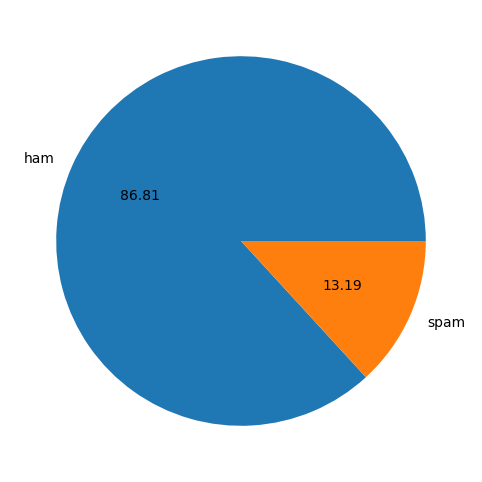

In [47]:
plt.figure(figsize=(12,6))
plt.pie(df1['Label'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

## CONCATENATE TWO DATASETS

In [48]:
df_u_df1 = pd.concat([df, df1], ignore_index=True)
df_u_df1

,Body,Label,no_char,no_words,no_sent
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,191,12
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,139,5
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,113,4
3,##############################################...,1,2863,690,35
4,I thought you might like these:\n1) Slim Down ...,1,641,108,4
...,...,...,...,...,...
9103,stumbl greatest way market centuri undoubtedli...,1,1336,200,1
9104,stumbl greatest way market centuri undoubtedli...,1,1336,200,1
9105,frontpag numbermeta nameprogid vlinknumb align...,1,1440,221,1
9106,htmlbodi tr td p number rate work home busi bf...,1,621,99,1


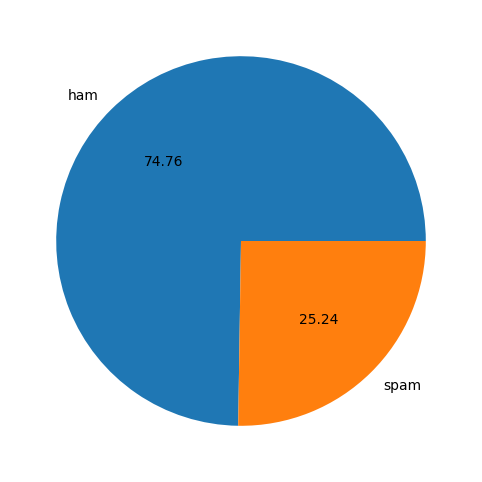

In [49]:
plt.figure(figsize=(12,6))
plt.pie(df_u_df1['Label'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

# SAVE SOME DATASETS

In [50]:
df_u_df1.to_csv('/content/gdrive/MyDrive/mail_datasets/cleaned_data_body_label_nowords_nochars_nosent/cleaned_orgin_data.csv', index=False)

## THIRD DATASETS

In [51]:
df2 = pd.read_csv('/content/gdrive/MyDrive/mail_datasets/spam_assassin.csv')
df2.head()

,text,target
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0


In [53]:
df2['text'][0]

"From ilug-admin@linux.ie Mon Jul 29 11:28:02 2002 Return-Path: <ilug-admin@linux.ie> Delivered-To: yyyy@localhost.netnoteinc.com Received: from localhost (localhost [127.0.0.1]) by phobos.labs.netnoteinc.com (Postfix) with ESMTP id A13D94414F for <jm@localhost>; Mon, 29 Jul 2002 06:25:11 -0400 (EDT) Received: from phobos [127.0.0.1] by localhost with IMAP (fetchmail-5.9.0) for jm@localhost (single-drop); Mon, 29 Jul 2002 11:25:11 +0100 (IST) Received: from lugh.tuatha.org (root@lugh.tuatha.org [194.125.145.45]) by dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g6RHn7i17130 for <jm-ilug@jmason.org>; Sat, 27 Jul 2002 18:49:07 +0100 Received: from lugh (root@localhost [127.0.0.1]) by lugh.tuatha.org (8.9.3/8.9.3) with ESMTP id SAA25016; Sat, 27 Jul 2002 18:45:03 +0100 X-Authentication-Warning: lugh.tuatha.org: Host root@localhost [127.0.0.1] claimed to be lugh Received: from mail1.mail.iol.ie (mail1.mail.iol.ie [194.125.2.192]) by lugh.tuatha.org (8.9.3/8.9.3) with ESMTP id SAA24977 f

In [62]:
import email
def extract_body(email_text):
    b = email.message_from_string(email_text)
    res = ""
    if b.is_multipart():
        for payload in b.get_payload():
            # if payload.is_multipart(): ...
            res += payload.get_payload()
    else:
        res = b.get_payload()
    return res

In [63]:
extract_body(df2['text'][0])

''

In [ ]:
df2['Body'] = df2['text'].apply()